In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Fig. 2.  Number of generation and fact labels across all datasets. (a) and (b) represent the Toutiao and MCFEND, respectively.

In [3]:
data = pd.read_csv('merge_22075_with_all_model.csv',dtype=str)
mcfend = pd.read_csv('MCFEND_for_classification.csv',dtype=str)

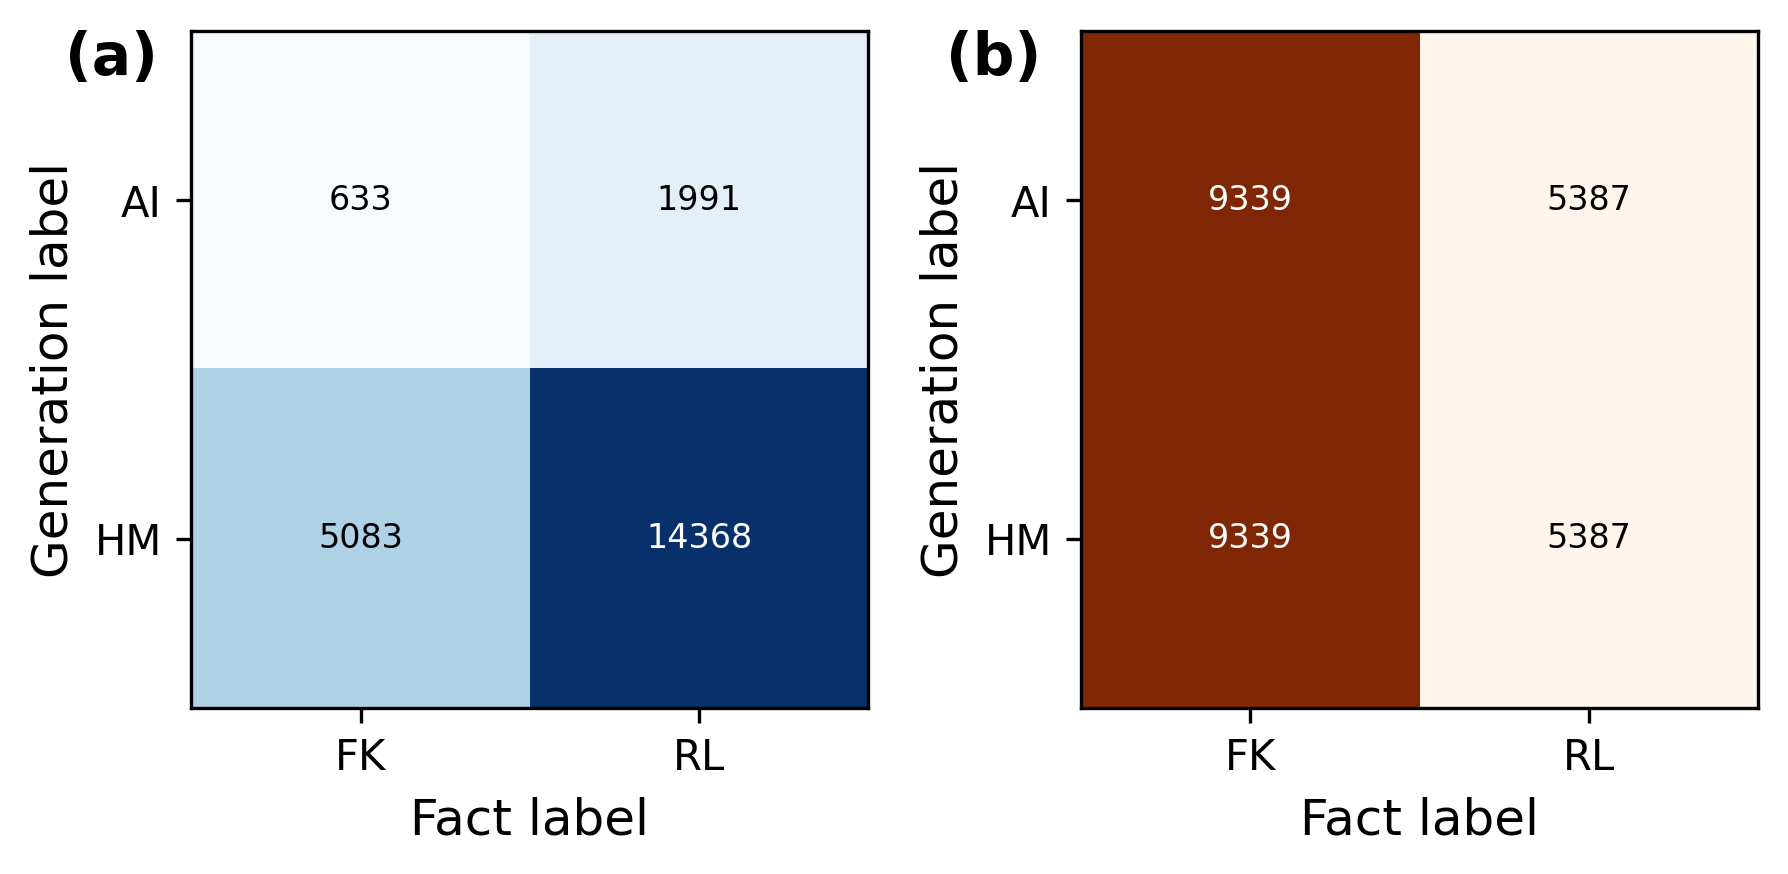

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ioutiao_matrix = np.array([[len(data[(data['MY_AI']=='1')&(data['MY_FK']=='1')]), len(data[(data['MY_AI']=='1')&(data['MY_FK']=='0')])],
                          [len(data[(data['MY_AI']=='0')&(data['MY_FK']=='1')]), len(data[(data['MY_AI']=='0')&(data['MY_FK']=='0')])]])

mcfend_matrix = np.array([[len(mcfend[(mcfend['MY_AI']=='1')&(mcfend['MY_FK']=='1')]), len(mcfend[(mcfend['MY_AI']=='1')&(mcfend['MY_FK']=='0')])],
                         [len(mcfend[(mcfend['MY_AI']=='0')&(mcfend['MY_FK']=='1')]), len(mcfend[(mcfend['MY_AI']=='0')&(mcfend['MY_FK']=='0')])]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.5, 3), dpi=300)

im1 = ax1.imshow(ioutiao_matrix, cmap='Blues', interpolation='nearest')
ax1.set_xlabel('Fact label', fontsize=12)
ax1.set_ylabel('Generation label', fontsize=12)

ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['FK', 'RL'], fontsize=10)
ax1.set_yticklabels(['AI', 'HM'], fontsize=10)

for i in range(2):
    for j in range(2):
        ax1.text(j, i, str(ioutiao_matrix[i, j]), 
                ha='center', va='center', fontsize=8, color='white' if ioutiao_matrix[i, j] > 10000 else 'black')

im2 = ax2.imshow(mcfend_matrix, cmap='Oranges', interpolation='nearest')
ax2.set_xlabel('Fact label', fontsize=12)
ax2.set_ylabel('Generation label', fontsize=12)

ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['FK', 'RL'], fontsize=10)
ax2.set_yticklabels(['AI', 'HM'], fontsize=10)

for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(mcfend_matrix[i, j]), 
                ha='center', va='center', fontsize=8, color='white' if mcfend_matrix[i, j] > 8000 else 'black')

plt.text(-3.5, -0.37, '(a)', fontsize=14, fontweight='bold')
plt.text(-0.9, -0.37, '(b)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("fig/metrics.eps", dpi=300)
plt.show()


# Fig. 3.  ASL across all datasets. (a) and (b) represent the ASL on the Toutiao and MCFEND, respectively.

In [6]:
# Define ASL calculations

def calculate_avg(dep_str):
    dep_list = ast.literal_eval(dep_str)
    if not dep_list:  
        return 0.0
    return sum(len(sub) for sub in dep_list) / len(dep_list)

# [hanlp_data_list] is the result of the HanLP analysis, which will be described in detail in its code.
# average_list = hanlp_data['dep'].apply(calculate_avg).tolist()#Here, 'dep', 'to'kpos', and 'dep' are the same, as the part-of-speech tagging results are identical.
# asl_data = pd.DataFrame([average_list,hanlp_data_list['MY_AI'].astype(str),hanlp_data_list['MY_FK'].astype(str)]).T
# asl_data = asl_data.rename(columns={0: 'Average Sentence Length', 1: 'MY_AI',2: 'MY_FK'})
# asl_data['ContentID'] = hanlp_data_list['ContentID']
# asl_data.to_csv('asl_MCFEND_or.csv',index=None)

asl_data = pd.read_csv('asl_data.csv',dtype=str)
asl_MCFEND_gen = pd.read_csv('asl_MCFEND_gen.csv',dtype=str)
asl_MCFEND_or = pd.read_csv('asl_MCFEND_or.csv',dtype=str)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


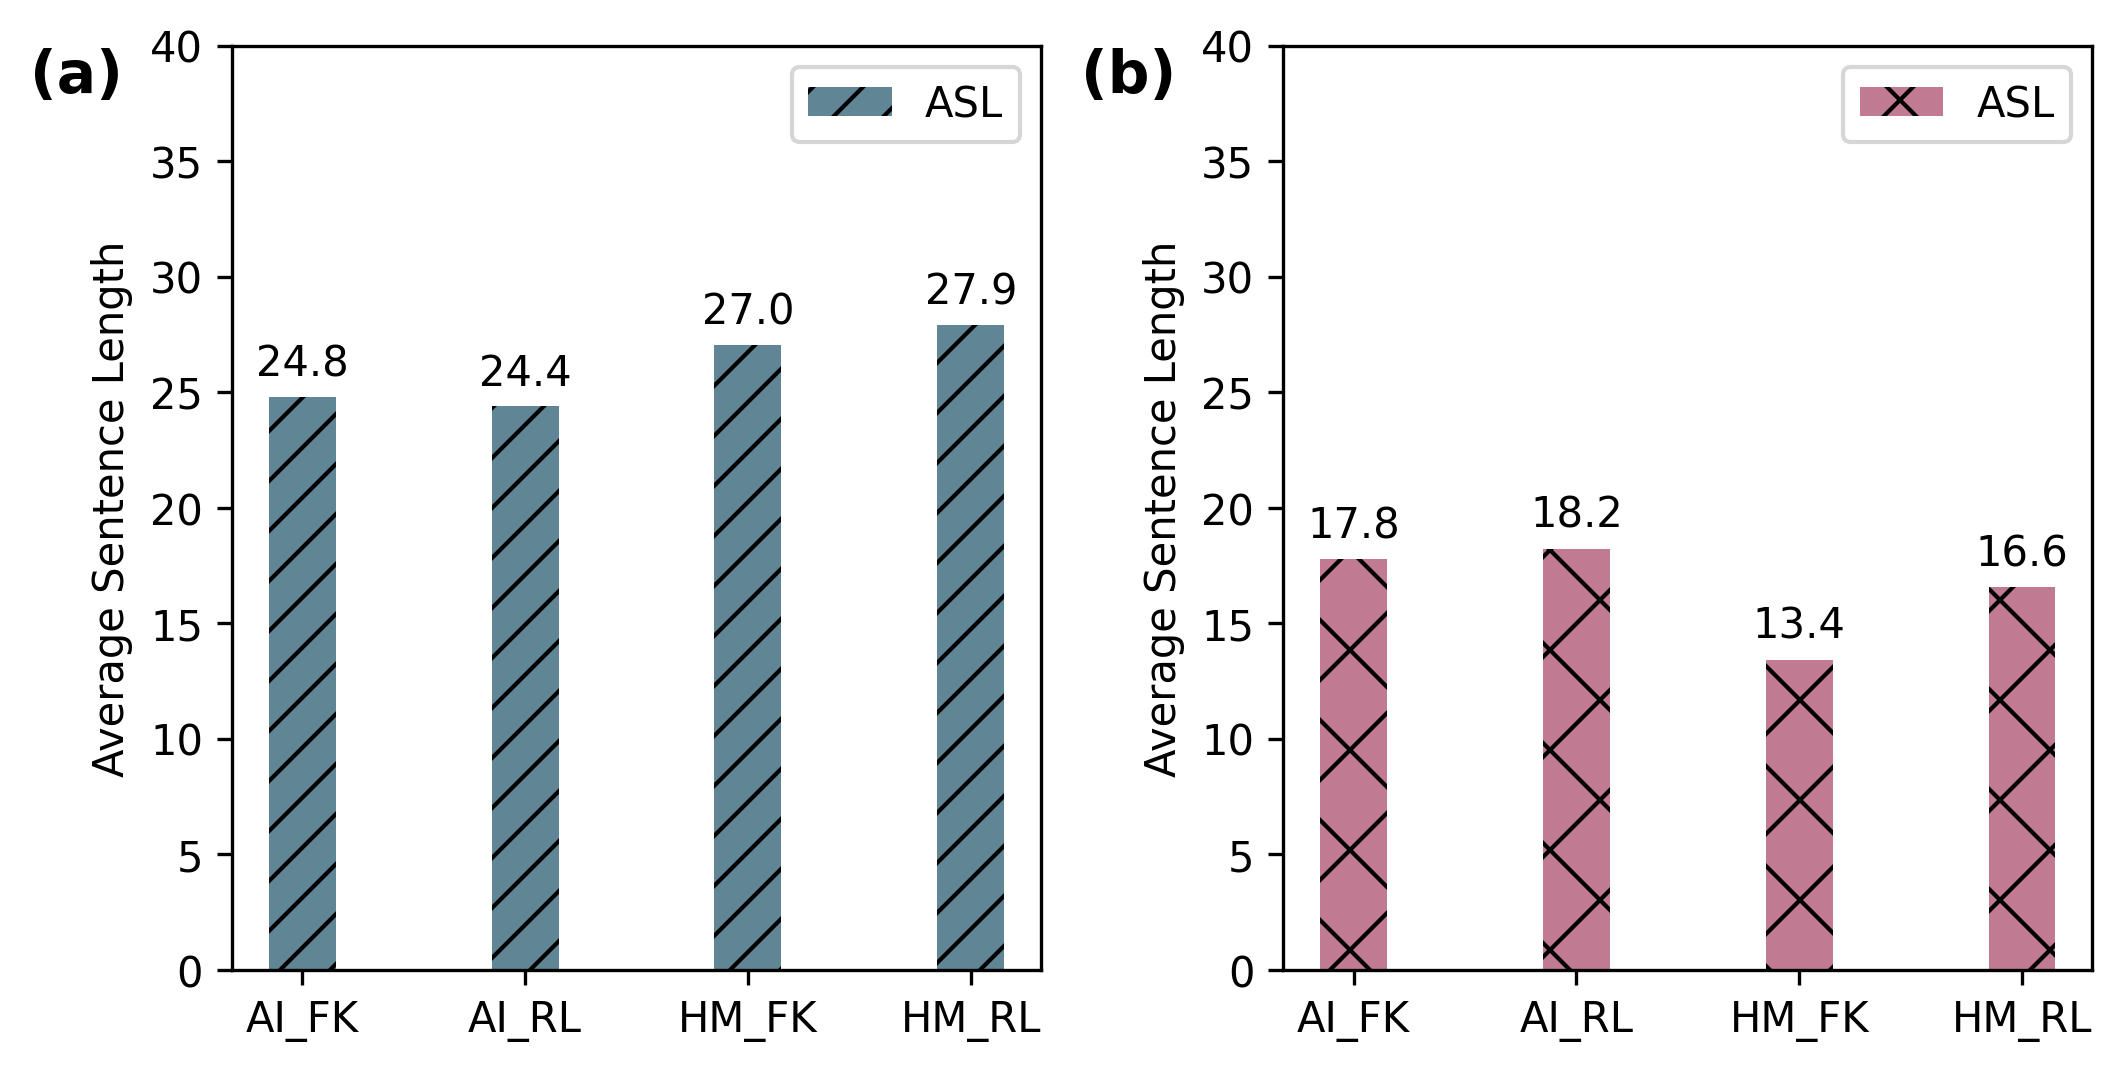

In [7]:
import numpy as np
import matplotlib.pyplot as plt

asl_AI_FK = sum(asl_data[(asl_data['MY_AI']=='1') & (asl_data['MY_FK']=='1')]['Average Sentence Length'].astype(float))/len(asl_data[(asl_data['MY_AI']=='1') & (asl_data['MY_FK']=='1')])
asl_AI_RL = sum(asl_data[(asl_data['MY_AI']=='1') & (asl_data['MY_FK']=='0')]['Average Sentence Length'].astype(float))/len(asl_data[(asl_data['MY_AI']=='1') & (asl_data['MY_FK']=='0')])
asl_HM_FK = sum(asl_data[(asl_data['MY_AI']=='0') & (asl_data['MY_FK']=='1')]['Average Sentence Length'].astype(float))/len(asl_data[(asl_data['MY_AI']=='0') & (asl_data['MY_FK']=='1')])
asl_HM_RL = sum(asl_data[(asl_data['MY_AI']=='0') & (asl_data['MY_FK']=='0')]['Average Sentence Length'].astype(float))/len(asl_data[(asl_data['MY_AI']=='0') & (asl_data['MY_FK']=='0')])

asl_MCFNED_AI_FK = sum(asl_MCFEND_gen[(asl_MCFEND_gen['MY_AI']=='1') & (asl_MCFEND_gen['MY_FK']=='1')]['Average Sentence Length'].astype(float))/len(asl_MCFEND_gen[(asl_MCFEND_gen['MY_AI']=='1') & (asl_MCFEND_gen['MY_FK']=='1')])
asl_MCFNED_AI_RL = sum(asl_MCFEND_gen[(asl_MCFEND_gen['MY_AI']=='1') & (asl_MCFEND_gen['MY_FK']=='0')]['Average Sentence Length'].astype(float))/len(asl_MCFEND_gen[(asl_MCFEND_gen['MY_AI']=='1') & (asl_MCFEND_gen['MY_FK']=='0')])
asl_MCFNED_HM_FK = sum(asl_MCFEND_or[(asl_MCFEND_or['MY_AI']=='0') & (asl_MCFEND_or['MY_FK']=='1')]['Average Sentence Length'].astype(float))/len(asl_MCFEND_or[(asl_MCFEND_or['MY_AI']=='0') & (asl_MCFEND_or['MY_FK']=='1')])
asl_MCFNED_HM_RL = sum(asl_MCFEND_or[(asl_MCFEND_or['MY_AI']=='0') & (asl_MCFEND_or['MY_FK']=='0')]['Average Sentence Length'].astype(float))/len(asl_MCFEND_or[(asl_MCFEND_or['MY_AI']=='0') & (asl_MCFEND_or['MY_FK']=='0')])

categories = ['AI_FK', 'AI_RL', 'HM_FK', 'HM_RL']
asl_datas = [asl_AI_FK, asl_AI_RL, asl_HM_FK, asl_HM_RL]
asl_mcfned_datas = [asl_MCFNED_AI_FK, asl_MCFNED_AI_RL, asl_MCFNED_HM_FK, asl_MCFNED_HM_RL]

x = np.arange(len(categories))
width = 0.30

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

rects1 = ax1.bar(x - width/2, asl_datas, width, label='ASL', color='#608595', hatch='//')
ax1.set_xticks([i - width/2 for i in range(len(categories))], categories)
ax1.set_xticklabels(categories)
ax1.set_ylabel('Average Sentence Length')
ax1.set_ylim(0, 40)
ax1.legend()

rects2 = ax2.bar(x - width/2, asl_mcfned_datas, width, label='ASL', color='#C07A92', hatch='X')
ax2.set_xticks([i - width/2 for i in range(len(categories))], categories)
ax2.set_xticklabels(categories)
ax2.set_ylabel('Average Sentence Length')
ax2.set_ylim(0, 40)
ax2.legend()

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(ax1, rects1)
add_labels(ax2, rects2)

plt.subplots_adjust(wspace=0.3, hspace=0.55)

plt.text(-0.25, 0.95, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')
plt.text(-0.25, 0.95, '(b)', transform=ax2.transAxes, fontsize=14, fontweight='bold')

plt.savefig("fig/asl.eps", dpi=300)
plt.show()


# Fig. 4.  Text frequency and average content length in different quality groups of all datasets.

In [9]:
data = pd.read_csv('merge_22075_with_all_model.csv',dtype=str)
CheapFK = pd.read_csv('mcfend_9339_Fake_for_CheapFake_Processed.csv',dtype=str)
CheapAI = pd.read_csv('mcfend_5387_real_for_CheapAI_Processed.csv',dtype=str)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


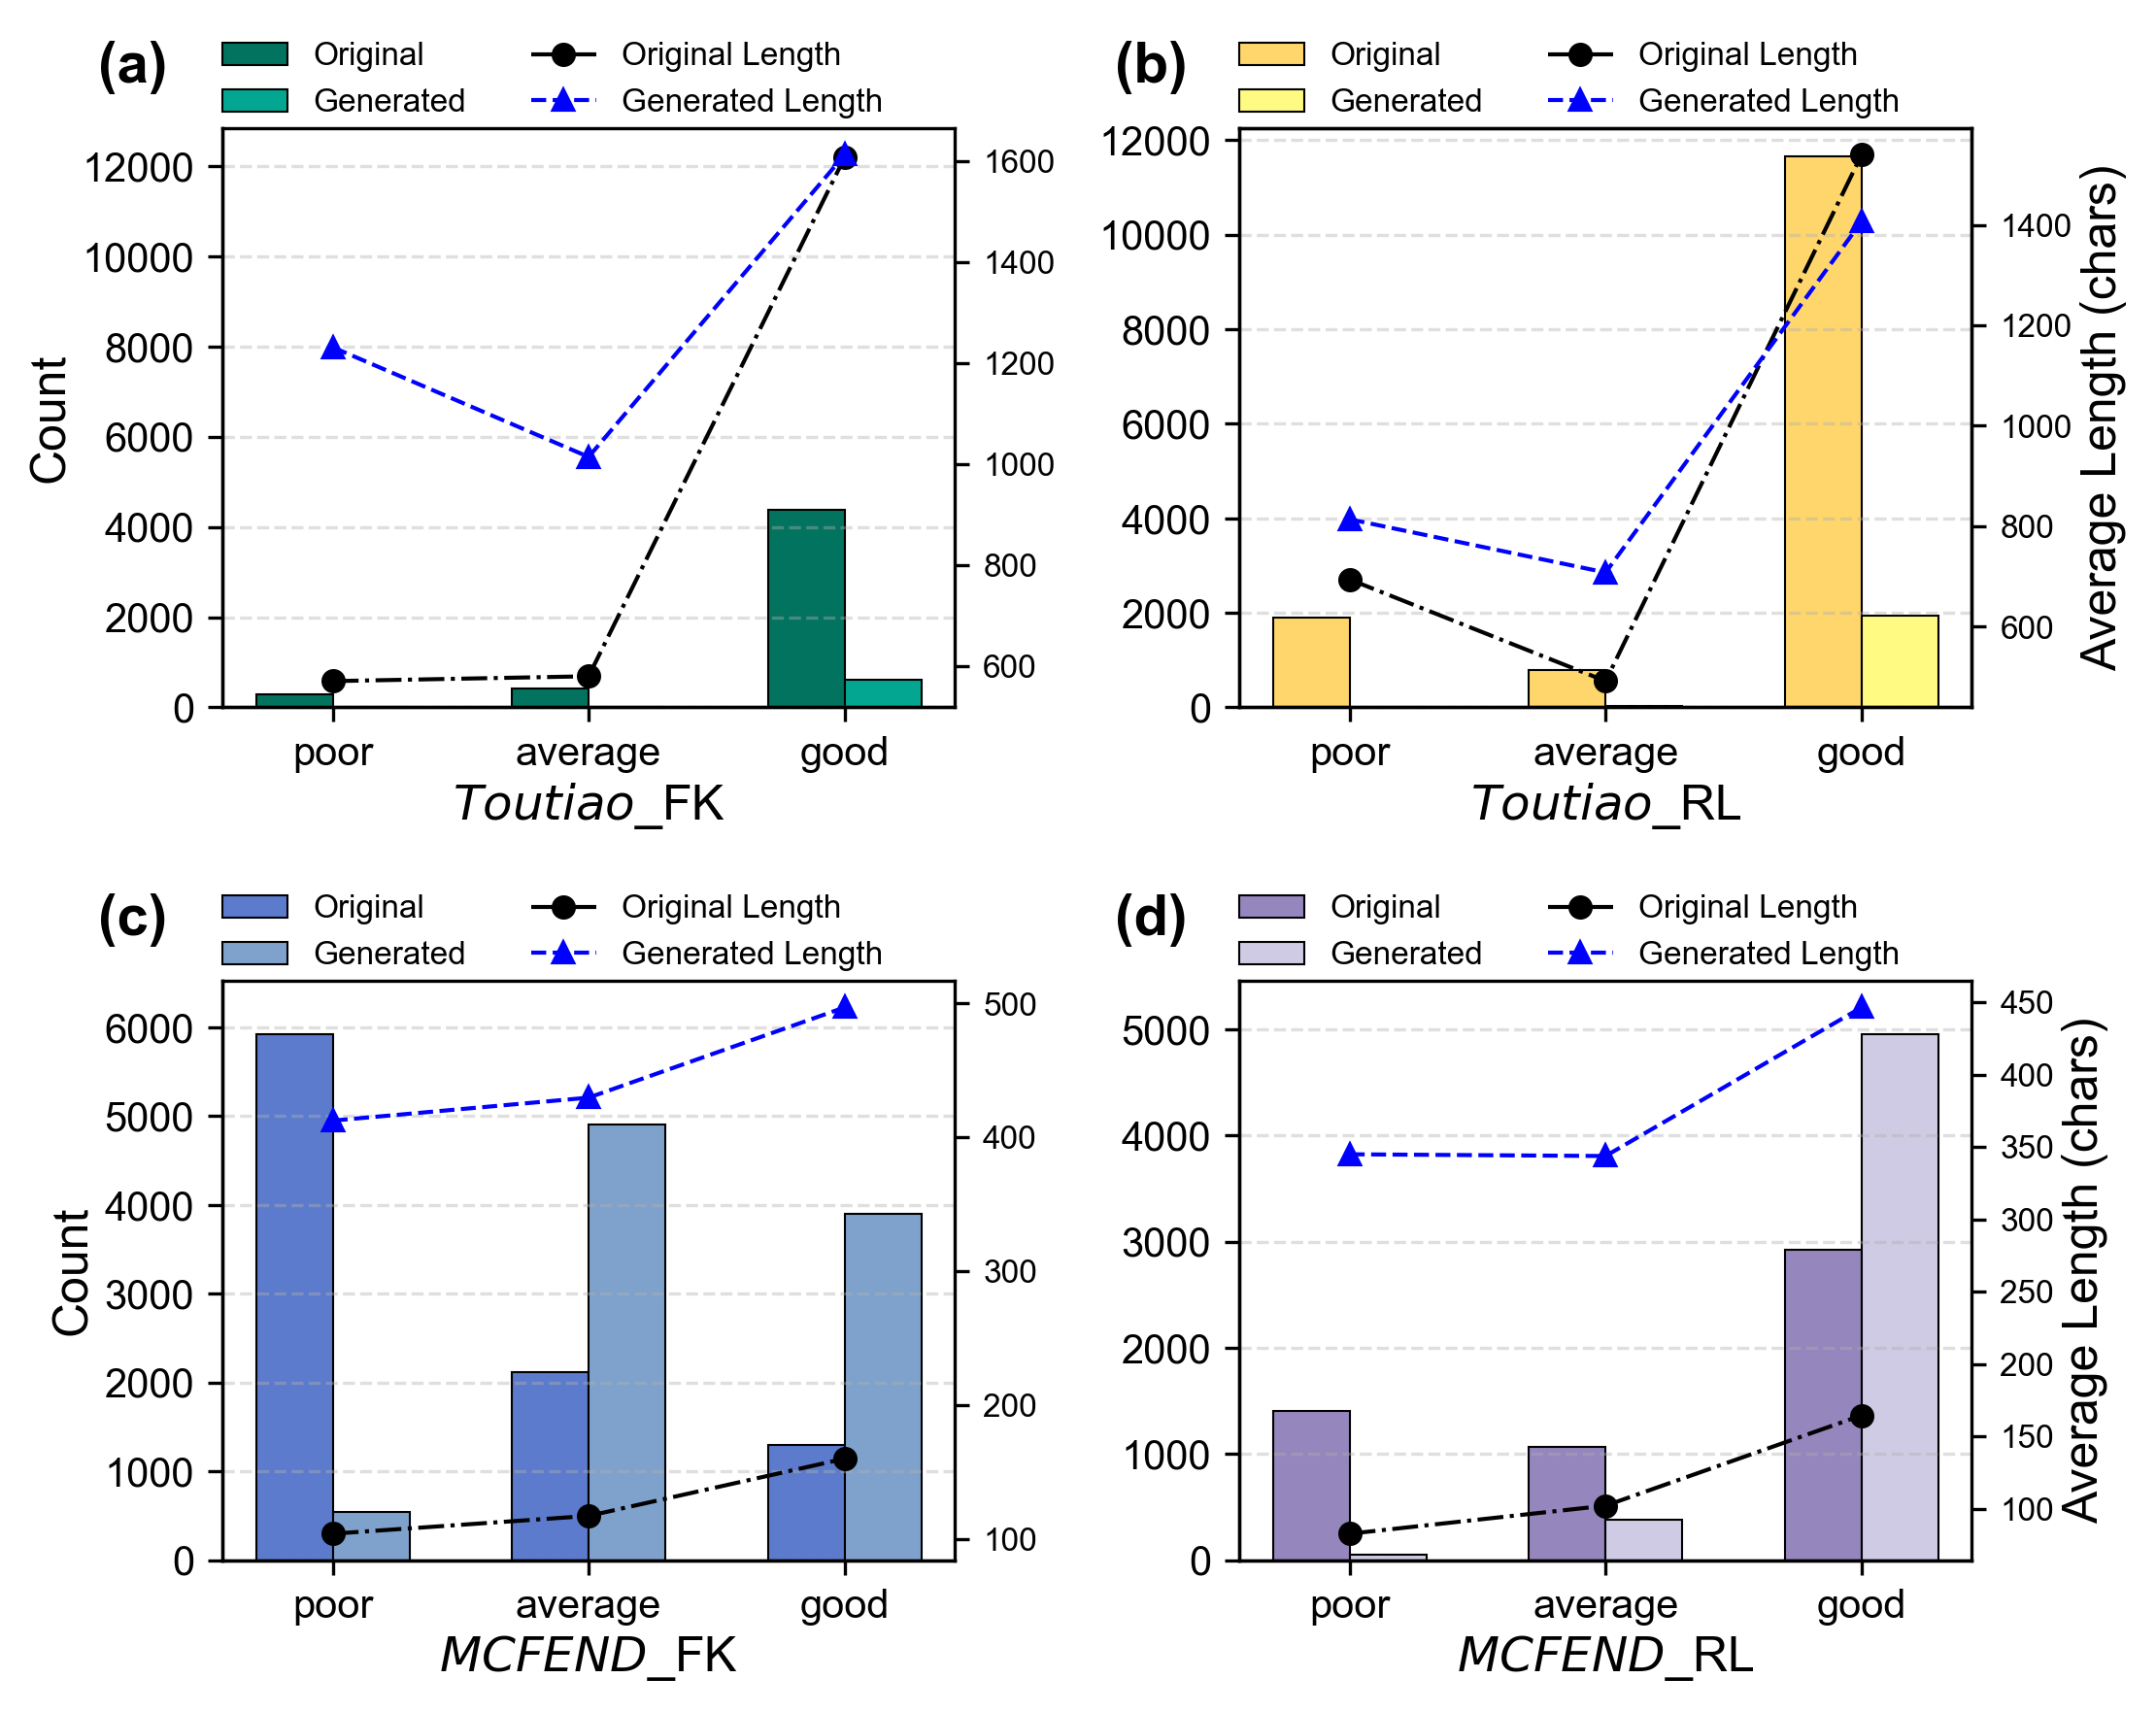

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

quality_order = ['poor', 'average', 'good']

plt.rcParams['font.family'] = 'Arial'
SCI_COLORS = ['#03A791','#7FA2CC','#A0CFD5']
LINE_COLORS = ['#BAAFC0','#9586BD']

fig = plt.figure(figsize=(7.5,6), dpi=300)
fig.subplots_adjust(wspace=0.4)

def safe_mean(series):
    clean_series = series.replace([np.inf,-np.inf], np.nan).fillna(0)
    return clean_series.mean() if not clean_series.empty else 0

data['title_length'] = data['title_length'].fillna(0).astype(int)
data['content_length'] = data['content_length'].fillna(0).astype(int)
data['MY_FK'] = data['MY_FK'].fillna(0).astype(str)
data['MY_AI'] = data['MY_AI'].fillna(0).astype(str)

bar_width = 0.3
index = np.arange(len(quality_order))

# ---------- Sub-graph-1 ----------
ax1 = fig.add_subplot(221)
value_counts_hm = data[(data['MY_FK']=='1')&(data['MY_AI']=='0')]['content_quality_finally'].value_counts().reindex(quality_order, fill_value=0)
value_counts_ai = data[(data['MY_FK']=='1')&(data['MY_AI']=='1')]['content_quality_finally'].value_counts().reindex(quality_order, fill_value=0)

bars_1 = ax1.bar(index - bar_width/2, value_counts_hm, bar_width, label='Original', color='#02735E', edgecolor='black', linewidth=0.5)
bars_1_2 = ax1.bar(index + bar_width/2, value_counts_ai, bar_width, label='Generated', color=SCI_COLORS[0], edgecolor='black', linewidth=0.5)

ax1_right = ax1.twinx()
avg_title_len_or = data[(data['MY_FK']=='1')&(data['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data[(data['MY_FK']=='1')&(data['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = avg_title_len_or + avg_content_len_or
line1 = ax1_right.plot(quality_order, avg_content_len_or, color='k', marker='o', ls='-.', markersize=5, linewidth=1, label='Original Length')

avg_title_len_gen = data[(data['MY_FK']=='1')&(data['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data[(data['MY_FK']=='1')&(data['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = avg_title_len_gen + avg_content_len_gen
line2 = ax1_right.plot(quality_order, avg_content_len_gen, color='blue', marker='^', ls='--', markersize=5, linewidth=1, label='Generated Length')

ax1_right.tick_params(axis='y', labelsize=8)

lines1 = line1 + line2
line_labels_1 = [l.get_label() for l in lines1]
bar_labels_1 = [b.get_label() for b in [bars_1]]+['Generated']
ax1.legend([bars_1,bars_1_2] + lines1, bar_labels_1 + line_labels_1, fontsize=8, frameon=False, ncol=2, loc='upper left', bbox_to_anchor=(-0.04,1.2))

ax1.set_xlabel('$Toutiao$_FK', fontsize=12, labelpad=2)
ax1.set_ylabel('Count', fontsize=12, labelpad=2)
ax1.tick_params(axis='both', which='major', labelsize=10)

# ---------- Sub-graph-1_ ----------
ax1_ = fig.add_subplot(222)
value_counts_hm = data[(data['MY_FK']=='0')&(data['MY_AI']=='0')]['content_quality_finally'].value_counts().reindex(quality_order, fill_value=0)
value_counts_ai = data[(data['MY_FK']=='0')&(data['MY_AI']=='1')]['content_quality_finally'].value_counts().reindex(quality_order, fill_value=0)

bars_1_ = ax1_.bar(index - bar_width/2, value_counts_hm, bar_width, label='Original', color='#FFD66B', edgecolor='black', linewidth=0.5)
bars_1_2_ = ax1_.bar(index + bar_width/2, value_counts_ai, bar_width, label='Generated', color='#FFFA81', edgecolor='black', linewidth=0.5)

ax1_right_ = ax1_.twinx()
avg_title_len_or = data[(data['MY_FK']=='0')&(data['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data[(data['MY_FK']=='0')&(data['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = avg_title_len_or + avg_content_len_or
line1_ = ax1_right_.plot(quality_order, avg_content_len_or, color='k', marker='o', ls='-.', markersize=5, linewidth=1, label='Original Length')

avg_title_len_gen = data[(data['MY_FK']=='0')&(data['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data[(data['MY_FK']=='0')&(data['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = avg_title_len_gen + avg_content_len_gen
line2_ = ax1_right_.plot(quality_order, avg_content_len_gen, color='blue', marker='^', ls='--', markersize=5, linewidth=1, label='Generated Length')

ax1_right_.tick_params(axis='y', labelsize=8)
ax1_right_.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)

lines1_ = line1_ + line2_
line_labels_1_ = [l.get_label() for l in lines1_]
bar_labels_1_ = [b.get_label() for b in [bars_1_]]+['Generated']
ax1_.legend([bars_1_,bars_1_2_] + lines1_, bar_labels_1_ + line_labels_1_, fontsize=8, frameon=False, ncol=2, loc='upper left', bbox_to_anchor=(-0.04,1.2))

ax1_.set_xlabel('$Toutiao$_RL', fontsize=12, labelpad=2)
ax1_.tick_params(axis='both', which='major', labelsize=10)

# ---------- Sub-graph-2 ----------
ax2 = fig.add_subplot(223)
gen_counts_fk = CheapFK['gen_quality_finally'].value_counts().reindex(quality_order, fill_value=0)
or_counts_fk = CheapFK['or_quality_finally'].value_counts().reindex(quality_order, fill_value=0)

CheapFK['HM_FK_title_length'] = CheapFK['HM_FK_title_length'].fillna(0).astype(float)
CheapFK['HM_FK_content_length'] = CheapFK['HM_FK_content_length'].fillna(0).astype(float)
avg_title_len = CheapFK.groupby('or_quality_finally')['HM_FK_title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len = CheapFK.groupby('or_quality_finally')['HM_FK_content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = avg_title_len + avg_content_len

CheapFK['AI_FK_title_length'] = CheapFK['AI_FK_title_length'].fillna(0).astype(float)
CheapFK['AI_FK_content_length'] = CheapFK['AI_FK_content_length'].fillna(0).astype(float)
avg_title_len = CheapFK.groupby('gen_quality_finally')['AI_FK_title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len = CheapFK.groupby('gen_quality_finally')['AI_FK_content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = avg_title_len + avg_content_len

ax2_right = ax2.twinx()
line2_1 = ax2_right.plot(quality_order, avg_content_len_or, color='k', marker='o', ls='-.', markersize=5, linewidth=1, label='Original Length')
line2_2 = ax2_right.plot(quality_order, avg_content_len_gen, color='blue', marker='^', ls='--', markersize=5, linewidth=1, label='Generated Length')

bars_2 = ax2.bar(index - bar_width/2, or_counts_fk, bar_width, label='Original', color='#5C7BCC', edgecolor='black', linewidth=0.5)
bars_2_2 = ax2.bar(index + bar_width/2, gen_counts_fk, bar_width, label='Generated', color=SCI_COLORS[1], edgecolor='black', linewidth=0.5)

ax2_right.tick_params(axis='y', labelsize=8)

ax2.set_xlabel('$MCFEND$_FK', fontsize=12, labelpad=2)
ax2.set_xticks(index)
ax2.set_ylabel('Count', fontsize=12, labelpad=2)
ax2.set_xticklabels(quality_order, fontsize=10)

lines2_ = line2_1 + line2_2
line_labels_2 = [l.get_label() for l in lines2_]
bar_labels_2 = [b.get_label() for b in [bars_2]]+['Generated']
ax2.legend([bars_2,bars_2_2] + lines2_, bar_labels_2 + line_labels_2, fontsize=8, frameon=False, ncol=2, loc='upper left', bbox_to_anchor=(-0.04,1.2))

# ---------- Sub-graph-3----------
ax3 = fig.add_subplot(224)
CheapAI['HM_RL_title_length'] = CheapAI['HM_RL_title_length'].fillna(0).astype(float)
CheapAI['HM_RL_content_length'] = CheapAI['HM_RL_content_length'].fillna(0).astype(float)
avg_title_len = CheapAI.groupby('or_quality_finally')['HM_RL_title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len = CheapAI.groupby('or_quality_finally')['HM_RL_content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = avg_title_len + avg_content_len

CheapAI['AI_RL_title_length'] = CheapAI['AI_RL_title_length'].fillna(0).astype(float)
CheapAI['AI_RL_content_length'] = CheapAI['AI_RL_content_length'].fillna(0).astype(float)
avg_title_len = CheapAI.groupby('gen_quality_finally')['AI_RL_title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len = CheapAI.groupby('gen_quality_finally')['AI_RL_content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = avg_title_len + avg_content_len

ax3_right = ax3.twinx()
line3_1 = ax3_right.plot(quality_order, avg_content_len_or, color='k', marker='o', ls='-.', markersize=5, linewidth=1, label='Original Length')
line3_2 = ax3_right.plot(quality_order, avg_content_len_gen, color='blue', marker='^', ls='--', markersize=5, linewidth=1, label='Generated Length')

ax3_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax3_right.tick_params(axis='y', labelsize=8)

gen_counts_ai = CheapAI['gen_quality_finally'].value_counts().reindex(quality_order, fill_value=0)
or_counts_ai = CheapAI['or_quality_finally'].value_counts().reindex(quality_order, fill_value=0)

bars_3 = ax3.bar(index - bar_width/2, or_counts_ai, bar_width, label='Original', color='#9586BD', edgecolor='black', linewidth=0.5)
bars_3_2 = ax3.bar(index + bar_width/2, gen_counts_ai, bar_width, label='Generated', color='#CFCBE4', edgecolor='black', linewidth=0.5)

ax3.set_xlabel('$MCFEND$_RL', fontsize=12, labelpad=2)
ax3.set_xticks(index)
ax3.set_xticklabels(quality_order, fontsize=10)

lines3_ = line3_1 + line3_2
line_labels_3 = [l.get_label() for l in lines3_]
bar_labels_3 = [b.get_label() for b in [bars_3]]+['Generated']
ax3.legend([bars_3,bars_3_2] + lines3_, bar_labels_3 + line_labels_3, fontsize=8, frameon=False, ncol=2, loc='upper left', bbox_to_anchor=(-0.04,1.2))


max_y = max(value_counts_hm.max(), gen_counts_fk.max(), or_counts_fk.max(), gen_counts_ai.max(), or_counts_ai.max())
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, max_y*1.1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
ax1_.grid(axis='y', linestyle='--', alpha=0.4)

max_y_fk = max(gen_counts_fk.max(), or_counts_fk.max())
max_y_ai = max(gen_counts_ai.max(), or_counts_ai.max())
ax2.set_ylim(0, max_y_fk*1.1)
ax3.set_ylim(0, max_y_ai*1.1)

ax1.text(-0.17, 1.08, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1_.text(-0.17, 1.08, '(b)', transform=ax1_.transAxes, fontsize=14, fontweight='bold')
ax2.text(-0.17, 1.08, '(c)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax3.text(-0.17, 1.08, '(d)', transform=ax3.transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("fig/quality_dp_2x2_new.eps", dpi=300)
plt.show()


# Underreporting rate

In [14]:
import pandas as pd

toutiao_ai = data[(data['文章标签']=='可能包含AI创作信息，请注意甄别') | (data['文章标签']=='内容可能存在AI创作，请注意甄别')].index.to_list()
my_ai = data[(data['MY_AI']=='1')]['MY_AI'].index.to_list()
toutiao_set = set(toutiao_ai)
my_set = set(my_ai)

false_negatives = len(my_set - toutiao_set)

total_positives = len(my_set)

false_negative_rate = false_negatives / total_positives

print(f"Underreporting Number: {false_negatives}")
print(f"AI Content: {total_positives}")
print(f"Toutiao - Underreporting rate: {false_negative_rate:.2%}")

Underreporting Number: 1257
AI Content: 2624
Toutiao - Underreporting rate: 47.90%


# RQ1a supplementary experiment adds statistics for three new datasets

In [2]:
import liwc
from bidict import bidict

import pandas as pd
import numpy as np
import re
import jieba
import emoji
from collections import Counter
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data1 = pd.read_csv('SUP_Gen_Q_Q/【all】mcfend_base.csv').astype(str)
data2 = pd.read_csv('SUP_Gen_Q_Q/【all】mcfend_dev.csv').astype(str)
data3 = pd.read_csv('SUP_Gen_Q_Q/【all】mcfend_hbd.csv').astype(str)



# This part of the code needs to request all the data, otherwise the text length statistics will fail
# This part of the code needs to request all the data, otherwise the text length statistics will fail
# This part of the code needs to request all the data, otherwise the text length statistics will fail

for data in [data1,data2,data3]:
    data['title_length'] = data['title'].str.len()
    data['content_length'] = data['content'].str.len()

In [ ]:



quality_order = [ 'poor', 'average', 'good']

# 设置全局参数
plt.rcParams['font.family'] = 'Arial'  # 使用学术字体
SCI_COLORS = ['#03A791','#7FA2CC', '#A0CFD5']  # 微软学术配色方案（蓝、橙）
LINE_COLORS = ['#BAAFC0', '#9586BD']  # 折线图配色（红、绿）

# 创建画布（总宽度10英寸，高度3英寸）
fig = plt.figure(figsize=(10, 6), dpi=300)
fig.subplots_adjust(wspace=0.4)  # 子图间距

# --------------------------
# 子图1：内容质量分布
# --------------------------
ax1 = fig.add_subplot(231)

# 数据处理

def safe_mean(series):
    clean_series = series.replace([np.inf, -np.inf], np.nan).fillna(0)
    return clean_series.mean() if not clean_series.empty else 0

data1['title_length'] = data1['title_length'].fillna(0).astype(int)
data1['content_length'] = data1['content_length'].fillna(0).astype(int)

data1['MY_FK'] = data1['MY_FK'].fillna(0).astype(str)
data1['MY_AI'] = data1['MY_AI'].fillna(0).astype(str)


# 绘图

# 绘图参数
bar_width = 0.3
index = np.arange(len(quality_order))

value_counts_hm = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_1 = ax1.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#024059', edgecolor='black', linewidth=0.5)

bars_1_2 = ax1.bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#58ACB7', edgecolor='black', linewidth=0.5)





# 创建第二个y轴
ax1_right = ax1.twinx()
data2['title_length'] = data2['title_length'].fillna(0).astype(int)
data2['content_length'] = data2['content_length'].fillna(0).astype(int)

data2['MY_FK'] = data2['MY_FK'].fillna(0).astype(str)
data2['MY_AI'] = data2['MY_AI'].fillna(0).astype(str)

# # 绘制折线图（右侧y轴）
avg_title_len_or = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)

avg_content_len_or=avg_title_len_or+avg_content_len_or
line1 = ax1_right.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data1[(data1['MY_FK']=='1')&(data1['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen

line2 = ax1_right.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax1_right.tick_params(axis='y', labelsize=8)

# # 合并图例
# lines =  line2
# line_labels = [l.get_label() for l in lines]
# bar_labels = [b.get_label() for b in [bars]]
# ax1.legend([bars] + lines, bar_labels + line_labels, 
#            fontsize=7, frameon=False, 
#            loc='upper left', bbox_to_anchor=(-0.04, 1.1))

lines1 =  line1 + line2
line_labels_1 = [l.get_label() for l in lines1]
bar_labels_1 = [b.get_label() for b in [bars_1]]+['Generated']

ax1.legend([bars_1,bars_1_2] + lines1, bar_labels_1 + line_labels_1, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax1.set_xlabel('$MCFEND\_base$_FK', fontsize=12, labelpad=2)
ax1.set_ylabel('Count', fontsize=12, labelpad=2)
ax1.tick_params(axis='both', which='major', labelsize=10)



ax1_ = fig.add_subplot(232)

# 数据处理
value_counts_hm = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_1_ = ax1_.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#FFD66B', edgecolor='black', linewidth=0.5)

bars_1_2_ = ax1_.bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#FFFA81', edgecolor='black', linewidth=0.5)



# 绘图
# 创建第二个y轴
ax1_right_ = ax1_.twinx()
data3['title_length'] = data3['title_length'].fillna(0).astype(int)
data3['content_length'] = data3['content_length'].fillna(0).astype(int)

data3['MY_FK'] = data3['MY_FK'].fillna(0).astype(str)
data3['MY_AI'] = data3['MY_AI'].fillna(0).astype(str)

avg_title_len_or = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or=avg_title_len_or+avg_content_len_or

line1_ = ax1_right_.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen
avg_content_len_gen[2]  = avg_content_len_gen[2]
line2_ = ax1_right_.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax1_right_.tick_params(axis='y', labelsize=8)
#ax1_right_.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)

lines1_ =  line1_ + line2_
line_labels_1_ = [l.get_label() for l in lines1_]
bar_labels_1_ = [b.get_label() for b in [bars_1_]]+['Generated']

ax1_.legend([bars_1_,bars_1_2_] + lines1_, bar_labels_1_ + line_labels_1_, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax1_.set_xlabel('$MCFEND\_dev$_FK', fontsize=12, labelpad=2)
ax1_.tick_params(axis='both', which='major', labelsize=10)


##########################################
ax1__ = fig.add_subplot(233)

# 数据处理
value_counts_hm = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_1__ = ax1__.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#DB662E', edgecolor='black', linewidth=0.5)

bars_1_2__ = ax1__ .bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#DB9488', edgecolor='black', linewidth=0.5)



# 绘图
# 创建第二个y轴
ax1_right__ = ax1__ .twinx()

avg_title_len_or = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or=avg_title_len_or+avg_content_len_or

line1__ = ax1_right__.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data3[(data3['MY_FK']=='1')&(data3['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen
avg_content_len_gen[2]  = avg_content_len_gen[2]
line2__ = ax1_right__.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax1_right__.tick_params(axis='y', labelsize=8)
ax1_right__.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)

lines1__ =  line1__ + line2__
line_labels_1__ = [l.get_label() for l in lines1__]
bar_labels_1__ = [b.get_label() for b in [bars_1__]]+['Generated']

ax1__.legend([bars_1__,bars_1_2__] + lines1__, bar_labels_1__ + line_labels_1__, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax1__.set_xlabel('$MCFEND\_hbd$_FK', fontsize=12, labelpad=2)
ax1__.tick_params(axis='both', which='major', labelsize=10)


###############################################################################
###############################################################################
#绘制第二排数据

# 数据处理

ax2 = fig.add_subplot(234)



# 绘图

# 绘图参数
bar_width = 0.3
index = np.arange(len(quality_order))

value_counts_hm = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_2 = ax2.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#0099DD', edgecolor='black', linewidth=0.5)

bars_2_2 = ax2.bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#A1C7E0', edgecolor='black', linewidth=0.5)



# 创建第二个y轴
ax2_right = ax2.twinx()
data2['title_length'] = data2['title_length'].fillna(0).astype(int)
data2['content_length'] = data2['content_length'].fillna(0).astype(int)

data2['MY_FK'] = data2['MY_FK'].fillna(0).astype(str)
data2['MY_AI'] = data2['MY_AI'].fillna(0).astype(str)

# # 绘制折线图（右侧y轴）
avg_title_len_or = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)

avg_content_len_or=avg_title_len_or+avg_content_len_or
line2 = ax2_right.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data1[(data1['MY_FK']=='0')&(data1['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen

line2_ = ax2_right.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax2_right.tick_params(axis='y', labelsize=8)

# # 合并图例
# lines =  line2
# line_labels = [l.get_label() for l in lines]
# bar_labels = [b.get_label() for b in [bars]]
# ax1.legend([bars] + lines, bar_labels + line_labels, 
#            fontsize=7, frameon=False, 
#            loc='upper left', bbox_to_anchor=(-0.04, 1.1))

lines2 =  line2 + line2_
line_labels_2 = [l.get_label() for l in lines2]
bar_labels_2 = [b.get_label() for b in [bars_2]]+['Generated']

ax2.legend([bars_2,bars_2_2] + lines1, bar_labels_2 + line_labels_2, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax2.set_xlabel('$MCFEND\_base$_RL', fontsize=12, labelpad=2)
ax2.set_ylabel('Count', fontsize=12, labelpad=2)
ax2.tick_params(axis='both', which='major', labelsize=10)



################################################################
ax2_ = fig.add_subplot(235)

# 数据处理
value_counts_hm = data2[(data2['MY_FK']=='0')&(data2['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data2[(data2['MY_FK']=='0')&(data2['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_2_ = ax2_.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#146152', edgecolor='black', linewidth=0.5)

bars_2_2_ = ax2_.bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#3B9470', edgecolor='black', linewidth=0.5)



# 绘图
# 创建第二个y轴
ax2_right_ = ax2_.twinx()
data3['title_length'] = data3['title_length'].fillna(0).astype(int)
data3['content_length'] = data3['content_length'].fillna(0).astype(int)

data3['MY_FK'] = data3['MY_FK'].fillna(0).astype(str)
data3['MY_AI'] = data3['MY_AI'].fillna(0).astype(str)

avg_title_len_or = data2[(data2['MY_FK']=='0')&(data2['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data2[(data2['MY_FK']=='0')&(data2['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or=avg_title_len_or+avg_content_len_or

line1_ = ax2_right_.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data2[(data2['MY_FK']=='1')&(data2['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen
avg_content_len_gen[2]  = avg_content_len_gen[2]
line2_ = ax2_right_.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax2_right_.tick_params(axis='y', labelsize=8)
#ax1_right_.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)

lines2_ =  line1_ + line2_
line_labels_2_ = [l.get_label() for l in lines2_]
bar_labels_2_ = [b.get_label() for b in [bars_2_]]+['Generated']

ax2_.legend([bars_2_,bars_2_2_] + lines2_, bar_labels_2_ + line_labels_2_, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax2_.set_xlabel('$MCFEND\_dev$_RL', fontsize=12, labelpad=2)
ax2_.tick_params(axis='both', which='major', labelsize=10)


#####################################################################
ax2__ = fig.add_subplot(236)

# 数据处理
value_counts_hm = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='0')]['content_quality_finally'].value_counts()
value_counts_hm = value_counts_hm.reindex(quality_order, fill_value=0)

value_counts_ai = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='1')]['content_quality_finally'].value_counts()
value_counts_ai = value_counts_ai.reindex(quality_order, fill_value=0)
# 绘图
bars_2__ = ax2__.bar(index - bar_width/2, value_counts_hm, bar_width, 
        label='Original', color='#F29325', edgecolor='black', linewidth=0.5)

bars_2_2__ = ax2__ .bar(index + bar_width/2, value_counts_ai, bar_width, 
        label='Generated', color='#F4CB9B', edgecolor='black', linewidth=0.5)



# 绘图
# 创建第二个y轴
ax2_right__ = ax2__ .twinx()

avg_title_len_or = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='0')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='0')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_or=avg_title_len_or+avg_content_len_or

line1__ = ax2_right__.plot(quality_order, avg_content_len_or, 
                      color='k', marker='o',  ls ='-.',
                      markersize=5, linewidth=1, 
                      label='Original Length')

avg_title_len_gen = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='1')].groupby('content_quality_finally')['title_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen = data3[(data3['MY_FK']=='0')&(data3['MY_AI']=='1')].groupby('content_quality_finally')['content_length'].apply(safe_mean).reindex(quality_order, fill_value=0)
avg_content_len_gen=avg_title_len_gen+avg_content_len_gen
avg_content_len_gen[2]  = avg_content_len_gen[2]
line2__ = ax2_right__.plot(quality_order, avg_content_len_gen, 
                      color='blue', marker='^',  ls ='--',
                      markersize=5, linewidth=1,
                      label='Generated Length')
# 设置右侧y轴格式
#ax1_right.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)
ax2_right__.tick_params(axis='y', labelsize=8)
ax2_right__.set_ylabel('Average Length (chars)', fontsize=12, labelpad=2)

lines2__ =  line1__ + line2__
line_labels_2__ = [l.get_label() for l in lines2__]
bar_labels_2__ = [b.get_label() for b in [bars_2__]]+['Generated']

ax2__.legend([bars_2__,bars_2_2__] + lines2__, bar_labels_2__ + line_labels_2__, 
           fontsize=8, frameon=False, ncol = 2,
           loc='upper left', bbox_to_anchor=(-0.04, 1.2))

# 格式设置
ax2__.set_xlabel('$MCFEND\_hbd$_RL', fontsize=12, labelpad=2)
ax2__.tick_params(axis='both', which='major', labelsize=10)



# # --------------------------
# # 全局调整
# # --------------------------


ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1_.grid(axis='y', linestyle='--', alpha=0.4)
ax1__.grid(axis='y', linestyle='--', alpha=0.4)



ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2_.grid(axis='y', linestyle='--', alpha=0.4)
ax2__.grid(axis='y', linestyle='--', alpha=0.4)




ax1.text(-0.17, 1.08, '(a)', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax1_.text(-0.17, 1.08, '(b)', transform=ax1_.transAxes, fontsize=14, fontweight='bold')
ax1__.text(-0.17, 1.08, '(c)', transform=ax1__.transAxes, fontsize=14, fontweight='bold')

ax2.text(-0.17, 1.08, '(d)', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax2_.text(-0.17, 1.08, '(e)', transform=ax2_.transAxes, fontsize=14, fontweight='bold')
ax2__.text(-0.17, 1.08, '(f)', transform=ax2__.transAxes, fontsize=14, fontweight='bold')


plt.tight_layout()
# plt.savefig("fig/quality_2x3.jpg", dpi=300)
# plt.savefig("fig/quality_2x3.svg", dpi=300)
plt.savefig("fig/quality_2x3_SUP.eps", dpi=300)
# plt.savefig("fig/quality_2x3.pdf", dpi=300)

plt.show()